In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Importing dataset

In [136]:
df= pd.read_csv(r"X:\BIA\Practise\Datasets\house_prices.csv")

In [137]:
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [138]:
df['location'].unique()

array(['G-10', 'E-11', 'G-15', ..., 'Defence Fort', 'Sihala Valley',
       'Shahra-e-Liaquat'], dtype=object)

In [139]:
df['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [140]:
df['purpose'].unique()

array(['For Sale', 'For Rent'], dtype=object)

In [141]:
df.isnull().sum()

Unnamed: 0       0
property_type    0
price            0
location         0
city             0
baths            0
purpose          0
bedrooms         0
Area_in_Marla    0
dtype: int64

In [142]:
df['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Lower Portion', 'Upper Portion',
       'Room', 'Farm House'], dtype=object)

## Transforming the string values of columns to numeric.

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
df['city']= LabelEncoder().fit_transform(df['city'])

In [145]:
df['property_type']= LabelEncoder().fit_transform(df['property_type'])

In [146]:
df['purpose']= LabelEncoder().fit_transform(df['purpose'])

In [147]:
df.head()

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,1,10000000,G-10,1,2,1,2,4.0
1,1,1,6900000,E-11,1,3,1,3,5.6
2,2,2,16500000,G-15,1,6,1,5,8.0
3,3,2,43500000,Bani Gala,1,4,1,4,40.0
4,4,2,7000000,DHA Defence,1,3,1,3,8.0


### Dropping unnecessary columns

In [148]:
df.drop(['Unnamed: 0','location'], axis= 1, inplace= True)

In [191]:
correlation= df.corr()

<Axes: >

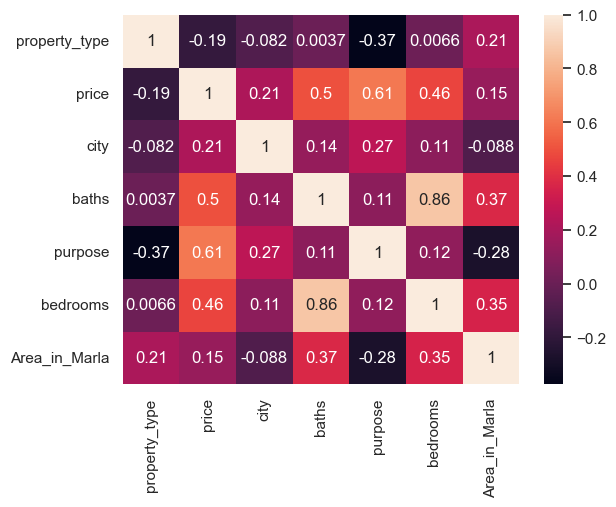

In [193]:
sns.heatmap(correlation, annot= True)

In [149]:
df['purpose'].value_counts()

purpose
1    70947
0    28552
Name: count, dtype: int64

# Linear Regression

### Defining features and target

In [150]:
X= df[['property_type','city','baths','purpose','bedrooms','Area_in_Marla']] # Features
y= df[['price']] # Target

#### Importing train_test_split and LinearRegression

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Splitting data into training and testing dataset

In [152]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

### Defining Model

In [153]:
linear= LinearRegression()

### Training model over training data

In [154]:
linear.fit(X_train, y_train)

LinearRegression()

In [155]:
y_pred= linear.predict(X_test)
y_pred

array([[12331347.19534758],
       [ 9175947.40236635],
       [-4326995.49550911],
       ...,
       [18152713.16154514],
       [ 9366059.08258656],
       [ 9125803.28509688]])

In [156]:
y_test

,price
68766,11500000
14737,6500000
77269,25000
71886,12000000
50816,22000000
...,...
41092,3900000
85832,35000
23861,14000000
35351,4200000


### Evaluation of results

In [157]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [158]:
mae= mean_absolute_error(y_test, y_pred)
mae

5172431.1814287

In [159]:
mse= mean_squared_error(y_test, y_pred)

In [160]:
rmsq= np.sqrt(mse)
rmsq

6870940.426490643

In [161]:
r2_score(y_test, y_pred)

0.5875454367108093

#### The evaluation suggest that our model is not good.

# Visualization of result

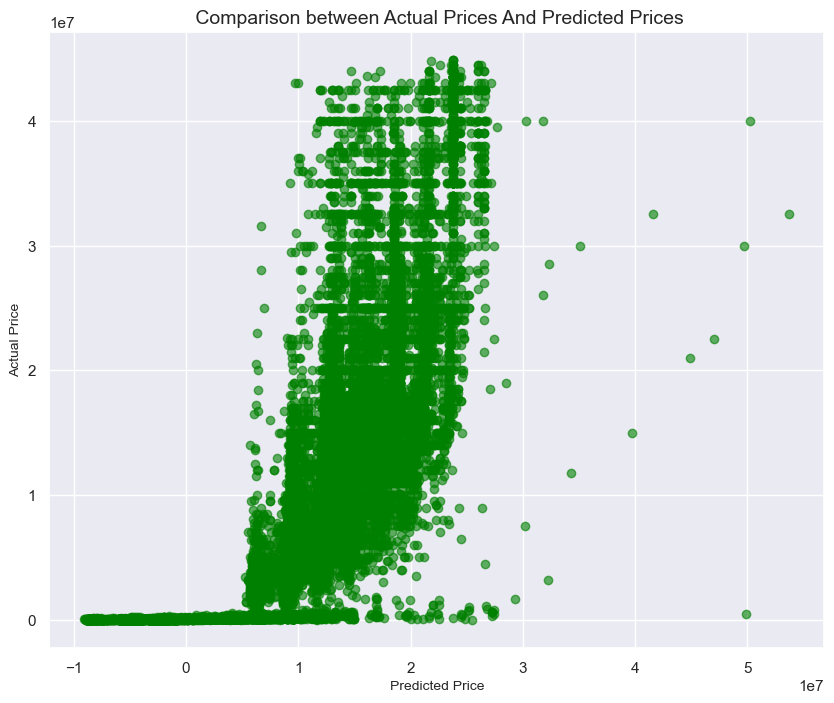

In [162]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
plt.scatter(y_pred, y_test, color= 'green', alpha= 0.6)
plt.xlabel("Predicted Price", fontsize= 10)
plt.ylabel("Actual Price", fontsize= 10)
plt.title(" Comparison between Actual Prices And Predicted Prices", fontsize= 14)
plt.show()

In [163]:
### 

In [164]:
sale_df= df[df['purpose'] == 1]
rent_df= df[df['purpose'] == 0]

# FOR SALE

In [165]:
sale_df.drop(['purpose'], axis= 1, inplace= True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_11444\3811321419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sale_df.drop(['purpose'], axis= 1, inplace= True)


In [166]:
sale_df.head()

,property_type,price,city,baths,bedrooms,Area_in_Marla
0,1,10000000,1,2,2,4.0
1,1,6900000,1,3,3,5.6
2,2,16500000,1,6,5,8.0
3,2,43500000,1,4,4,40.0
4,2,7000000,1,3,3,8.0


In [167]:
X= sale_df[['property_type','city','baths','bedrooms','Area_in_Marla']]
y= sale_df[['price']]

In [168]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state=42)

In [169]:
linear= LinearRegression()

In [170]:
linear.fit(X_train, y_train)

LinearRegression()

In [171]:
y_pred= linear.predict(X_test)
y_pred

array([[ 7199136.46999268],
       [11913938.84143282],
       [22036748.24095191],
       ...,
       [ 7752010.86160936],
       [ 4619504.1878006 ],
       [10506045.78484939]])

In [172]:
y_test

,price
81744,8100000
63980,11500000
87531,27000000
20660,35000000
50168,10500000
...,...
54652,14500000
19777,8000000
33786,8500000
9950,2500000


In [173]:
mae= mean_absolute_error(y_test, y_pred)
mae

4750636.818185001

In [174]:
mse= mean_squared_error(y_test, y_pred)
mse

48683066006566.77

In [175]:
rmsq= np.sqrt(mse)
rmsq

6977325.132639783

In [176]:
r2_score(y_test, y_pred)

0.5070050572488669

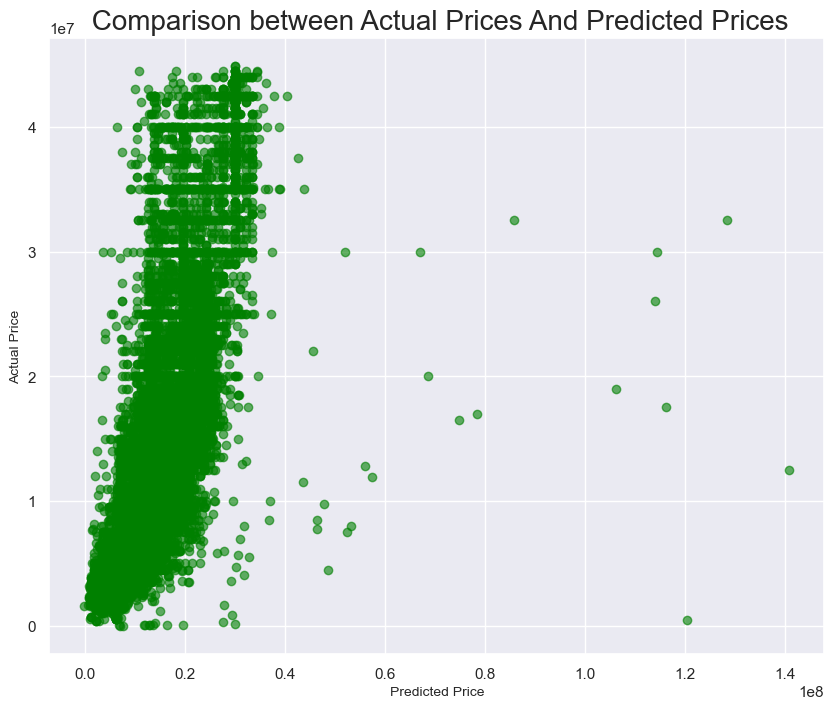

In [196]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
plt.scatter(y_pred, y_test, color= 'green', alpha= 0.6)
plt.xlabel("Predicted Price", fontsize= 10)
plt.ylabel("Actual Price", fontsize= 10)
plt.title(" Comparison between Actual Prices And Predicted Prices", fontsize= 20)
plt.show()

# For Rent

In [178]:
rent_df.drop(['purpose'], axis= 1, inplace= True)

C:\Users\abdul\AppData\Local\Temp\ipykernel_11444\534572816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df.drop(['purpose'], axis= 1, inplace= True)


In [179]:
X1= rent_df[['property_type','city','baths','bedrooms','Area_in_Marla']]
y1= rent_df[['price']]

In [180]:
X1_train, X1_test, y1_train, y1_test= train_test_split(X1,y1, test_size=0.2, random_state=42)

In [181]:
linear= LinearRegression()

In [182]:
linear.fit(X1_train, y1_train)

LinearRegression()

In [183]:
y1_pred= linear.predict(X1_test)

In [184]:
mae= mean_absolute_error(y1_test, y1_pred)
mae

40772.95689761595

In [185]:
mse= mean_squared_error(y1_test, y1_pred)

In [186]:
rmsq= np.sqrt(mse)
rmsq

80031.57154891398

In [187]:
r2_score(y1_test, y1_pred)

0.4828553172293345

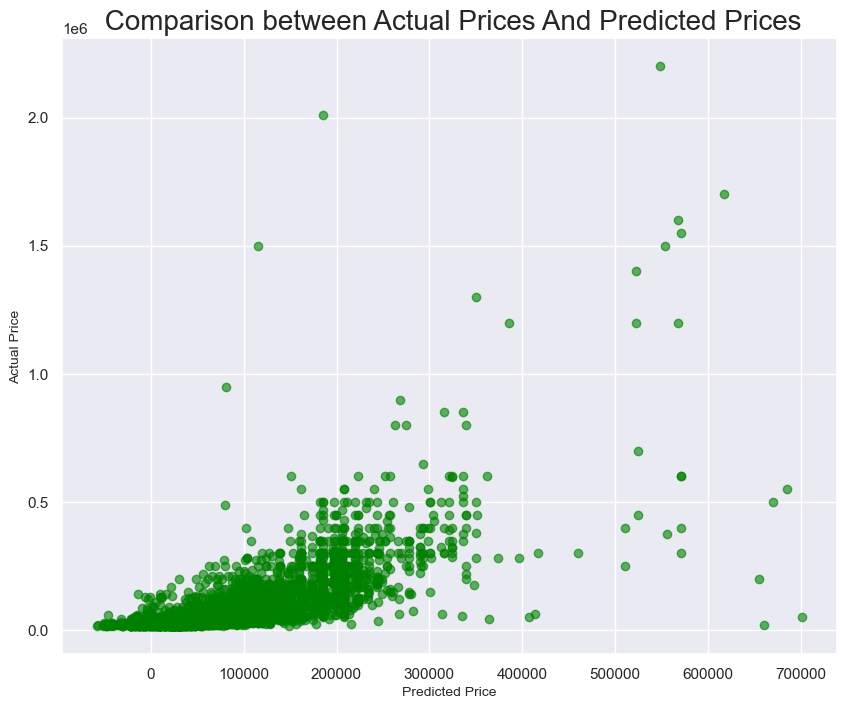

In [197]:
plt.figure(figsize=(10,8))
sns.set(style='darkgrid')
plt.scatter(y1_pred, y1_test, color= 'green', alpha= 0.6)
plt.xlabel("Predicted Price", fontsize= 10)
plt.ylabel("Actual Price", fontsize= 10)
plt.title(" Comparison between Actual Prices And Predicted Prices", fontsize= 20)
plt.show()

# Polynomial Regression

In [215]:
df= pd.read_csv(r"X:\BIA\Practise\Datasets\house_prices.csv")

In [216]:
df

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [208]:
dff['Area_in_Marla']= dff['Area_in_Marla'] ** 2
area_sq= dff[['Area_in_Marla']]
price= dff[['price']]

In [209]:
dff

,property_type,price,city,baths,purpose,bedrooms,Area_in_Marla
0,1,10000000,1,2,1,2,4.294967e+09
1,1,6900000,1,3,1,3,9.354238e+11
2,2,16500000,1,6,1,5,2.814750e+14
3,2,43500000,1,4,1,4,4.294967e+25
4,2,7000000,1,3,1,3,2.814750e+14
...,...,...,...,...,...,...,...
99494,1,7500000,2,3,1,3,2.814750e+14
99495,2,8800000,2,4,1,3,2.814750e+14
99496,2,14000000,2,3,1,3,2.814750e+14
99497,2,14000000,2,4,1,4,2.177953e+18


In [217]:
df['city']= LabelEncoder().fit_transform(df['city'])

df['property_type']= LabelEncoder().fit_transform(df['property_type'])

df['purpose']= LabelEncoder().fit_transform(df['purpose'])

In [218]:
df.drop(['Unnamed: 0','location'], axis= 1, inplace= True)

In [219]:
df

,property_type,price,city,baths,purpose,bedrooms,Area_in_Marla
0,1,10000000,1,2,1,2,4.0
1,1,6900000,1,3,1,3,5.6
2,2,16500000,1,6,1,5,8.0
3,2,43500000,1,4,1,4,40.0
4,2,7000000,1,3,1,3,8.0
...,...,...,...,...,...,...,...
99494,1,7500000,2,3,1,3,8.0
99495,2,8800000,2,4,1,3,8.0
99496,2,14000000,2,3,1,3,8.0
99497,2,14000000,2,4,1,4,14.0


In [221]:
df['Area_in_Marla']= df['Area_in_Marla'] ** 2
area_sq= df[['Area_in_Marla']]
price= df[['price']]

In [222]:
area_sq_train, area_sq_test, price_train, price_test= train_test_split(area_sq, price, test_size= 0.2, random_state= 42)

In [223]:
from sklearn.preprocessing import PolynomialFeatures

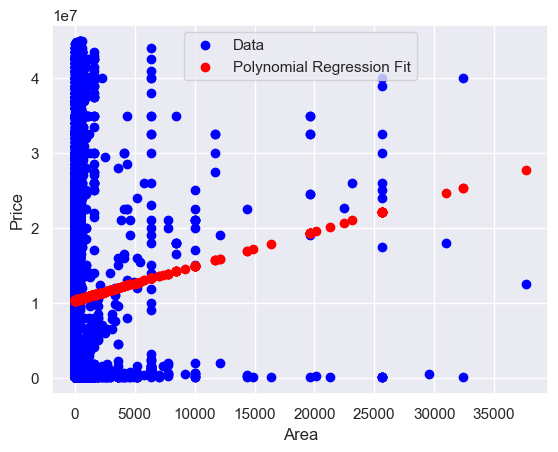

In [232]:
#  Applying Polynomial Regression
degree= 1
poly_feature= PolynomialFeatures(degree=degree)
X_train_poly= poly_feature.fit_transform(area_sq_train)
X_test_poly= poly_feature.fit_transform(area_sq_test)

# Linear regression model to fit the transformed features
model= LinearRegression()
model.fit(X_train_poly, price_train)

# Predicting and evaluating the model
y_train_pred= model.predict(X_train_poly)
y_test_pred= model.predict(X_test_poly)

# Plotting
plt.scatter(area_sq, price, color='blue', label='Data')
plt.scatter(area_sq_train, y_train_pred, color='red', label='Polynomial Regression Fit')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()

# Visualization

In [233]:
df= pd.read_csv(r"X:\BIA\Practise\Datasets\house_prices.csv")

In [234]:
df

,Unnamed: 0,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0
...,...,...,...,...,...,...,...,...,...
99494,168435,Flat,7500000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99495,168436,House,8800000,Bahria Town Karachi,Karachi,4,For Sale,3,8.0
99496,168438,House,14000000,Bahria Town Karachi,Karachi,3,For Sale,3,8.0
99497,168439,House,14000000,Bahria Town Karachi,Karachi,4,For Sale,4,14.0


In [235]:
df['city'].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

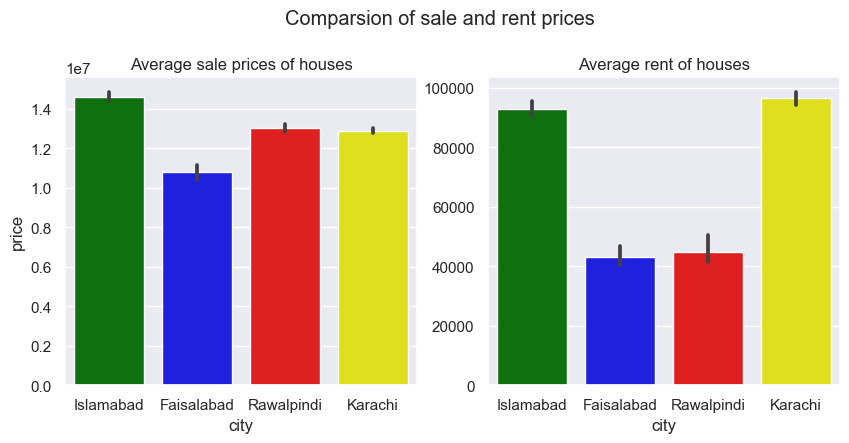

In [259]:
filtered_df = df[(df['purpose'] == 'For Sale') & df['city'].isin(['Islamabad', 'Rawalpindi', 'Karachi', 'Faisalabad'])]

city_colours= {
    'Karachi': 'yellow',
    'Islamabad': 'green',
    'Rawalpindi': 'red',
    'Faisalabad': 'blue'
}

city_order= ['Islamabad','Faisalabad','Rawalpindi','Karachi']

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(data= filtered_df, x= 'city', y= 'price', palette= city_colours, order= city_order)
plt.title('Average sale prices of houses')

plt.subplot(1,2,2)
sns.barplot(data= df[df['purpose'] == 'For Rent'], x= 'city', y= 'price', palette= city_colours, order= city_order)
plt.ylabel('')
plt.title('Average rent of houses')

plt.suptitle("Comparsion of sale and rent prices", y= 1.05)

plt.show()


In [260]:
islamabad_df= df[df['city'] == 'Islamabad']

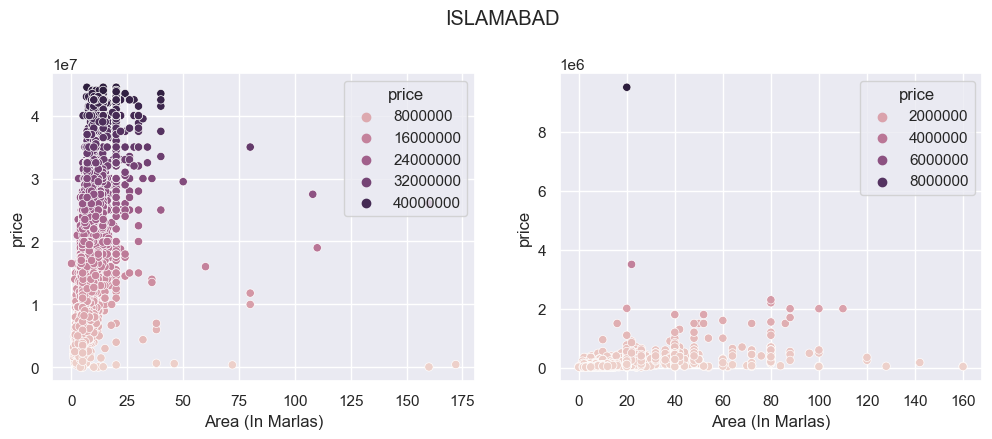

In [288]:
plt.figure(figsize=(12,4))

sale_isl= islamabad_df[islamabad_df['purpose'] == 'For Sale']

rent_isl= islamabad_df[islamabad_df['purpose'] == 'For Rent']

plt.subplot(1,2,1)
sns.scatterplot(x= 'Area_in_Marla', y= 'price', data= sale_isl, hue= 'price')
plt.xlabel('Area (In Marlas)')

plt.subplot(1,2,2)
sns.scatterplot(x= 'Area_in_Marla', y= 'price', data= rent_isl, hue= 'price')
plt.xlabel('Area (In Marlas)')

plt.suptitle("ISLAMABAD", y= 1.04)

plt.show()

In [289]:
karachi_df= df[df['city'] == 'Karachi']

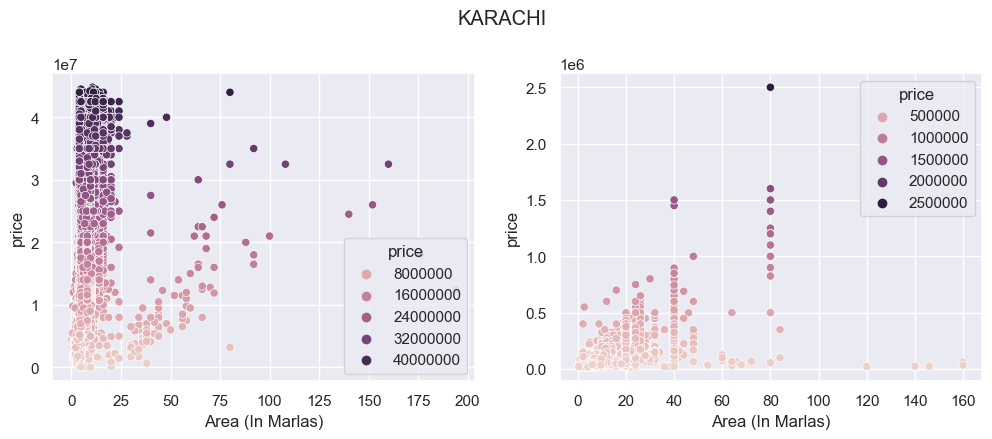

In [290]:
plt.figure(figsize=(12,4))

sale_khi= karachi_df[karachi_df['purpose'] == 'For Sale']

rent_khi= karachi_df[karachi_df['purpose'] == 'For Rent']

plt.subplot(1,2,1)
sns.scatterplot(x= 'Area_in_Marla', y= 'price', data= sale_khi, hue= 'price')
plt.xlabel('Area (In Marlas)')

plt.subplot(1,2,2)
sns.scatterplot(x= 'Area_in_Marla', y= 'price', data= rent_khi, hue= 'price')
plt.xlabel('Area (In Marlas)')

plt.suptitle("KARACHI", y= 1.04)

plt.show()

In [291]:
faisalabad_df= df[df['city'] == 'Faisalabad']

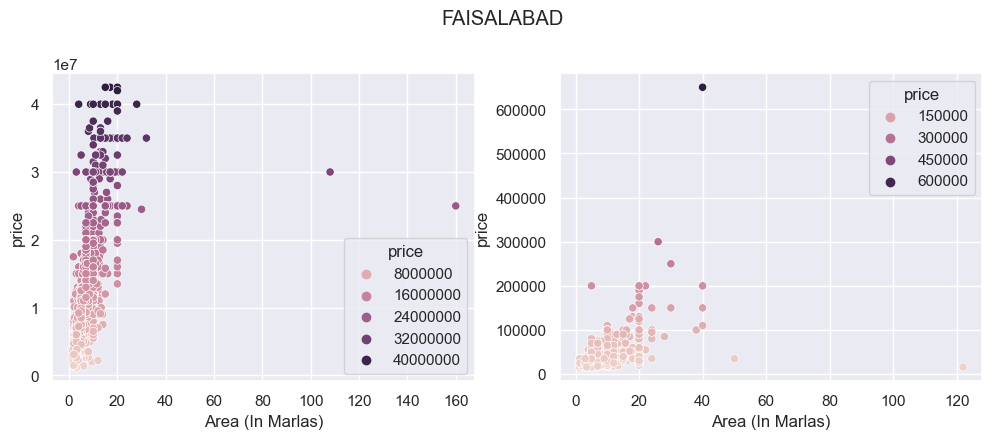

In [292]:
plt.figure(figsize=(12,4))

sale_fbd= faisalabad_df[faisalabad_df['purpose'] == 'For Sale']

rent_fbd= faisalabad_df[faisalabad_df['purpose'] == 'For Rent']

plt.subplot(1,2,1)
sns.scatterplot(x= 'Area_in_Marla', y= 'price', data= sale_fbd, hue= 'price')
plt.xlabel('Area (In Marlas)')

plt.subplot(1,2,2)
sns.scatterplot(x= 'Area_in_Marla', y= 'price', data= rent_fbd, hue= 'price')
plt.xlabel('Area (In Marlas)')

plt.suptitle("FAISALABAD", y= 1.04)

plt.show()

In [293]:
rwl_df= df[df['city'] == 'Rawalpindi']

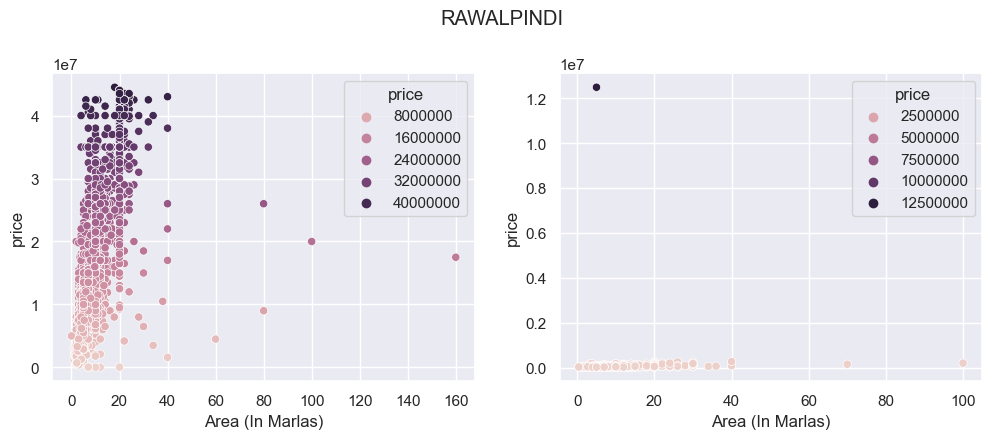

In [294]:
plt.figure(figsize=(12,4))

sale_rwl= rwl_df[rwl_df['purpose'] == 'For Sale']

rent_rwl= rwl_df[rwl_df['purpose'] == 'For Rent']

plt.subplot(1,2,1)
sns.scatterplot(x= 'Area_in_Marla', y= 'price', data= sale_rwl, hue= 'price')
plt.xlabel('Area (In Marlas)')

plt.subplot(1,2,2)
sns.scatterplot(x= 'Area_in_Marla', y= 'price', data= rent_rwl, hue= 'price')
plt.xlabel('Area (In Marlas)')

plt.suptitle("RAWALPINDI", y= 1.04)

plt.show()